# Contenido del proyecto

* [Introducciòn](#introduccion)
* [Objetivo general](#general)
* [Objetivos especìficos](#especificos)
* [Informaciòn de los datos](#informacion)
* [Proceso de anàlisis de datos](#analisis)
* [Identificaciòn de los datos atipicos](#atipicos)
* [Ejecuciòn del modelo](#modelo)
* [Conclusiones](#conclusiones)
* [Presentaciòn y dashboard](#presentacion_dashboard)

# Introducciòn <a id='introduccion'></a>

La compañìa CallMeMaybe se encuentra desarrollando una nueva funciòn para brindar informaciòn sobre la eficacia de operadores de telefonìa. El anàlisis de los datos se realiza para identificar los niveles de eficacia de los operadores de telefonìa de acuerdo a las caracterìstcias identificadas en el proceso de anàlisis de los datos.

# Objetivo general <a id='general'></a>

Importar y analizar los datos que permitiràn identificar la ineficacia de los operadores de telefonìa y posteriormente proporcionar èsta informaciòn a los clientes de la compañìa que requieren distribuir gran cantidad de llamadas entrantes o salientes entre varios operadores o llamadas internas entre el mismo operador.

# Objetivos especìficos <a id='especificos'></a>

* Retroalimentar a los clientes los operadores que de acuerdo al anàlisis se consideran eficientes o ineficientes.

* Recomendar a los clientes la utilizaciòn o no de cada operador para garantizar mejores servicios.

* Determinar la importancia de las caracterìsticas que definen a un operador ineficiente.

# Informaciòn general de los datos <a id='informacion'></a>

Se importan las librerìas necesarias.

In [334]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats
from scipy import stats as st
import math as mht
import plotly.express as px
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
from sklearn import linear_model
from sklearn.metrics import accuracy_score,precision_score,recall_score
from sklearn.linear_model import LogisticRegression
from scipy.cluster.hierarchy import dendrogram,linkage
from sklearn.cluster import KMeans, DBSCAN
from sklearn.metrics import davies_bouldin_score
from sklearn.decomposition import PCA
import mpl_toolkits.axisartist as axisartist


In [335]:
telecom=pd.read_csv('telecom_dataset_us.csv') #Se importa la tabla que contiene informaciòn de operadores y llamadas.

In [336]:
telecom.info() #Se verifica la informaciòn general de la tabla.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53902 entries, 0 to 53901
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   user_id              53902 non-null  int64  
 1   date                 53902 non-null  object 
 2   direction            53902 non-null  object 
 3   internal             53785 non-null  object 
 4   operator_id          45730 non-null  float64
 5   is_missed_call       53902 non-null  bool   
 6   calls_count          53902 non-null  int64  
 7   call_duration        53902 non-null  int64  
 8   total_call_duration  53902 non-null  int64  
dtypes: bool(1), float64(1), int64(4), object(3)
memory usage: 3.3+ MB


Se identifica que el tipo de dato para la columna "date" debe cambiarse a formato tipo fecha, el tipo de dato para la columna "internal" se considera que debe cambiarse a tipo booleano, el tipo de dato para la columna "operator_id" se decide cambiar por tipo object, el tipo de dato para la columna "user_id" se decide cambiar a tipo object y el tipo de dato de la columna "direction" se decide cambiar a tipo booleano, para facilitar el anàlisis de procesos como el anàlisis de correlaciòn entre las variables.

In [337]:
telecom.head()

,user_id,date,direction,internal,operator_id,is_missed_call,calls_count,call_duration,total_call_duration
0,166377,2019-08-04 00:00:00+03:00,in,False,NaN,True,2,0,4
1,166377,2019-08-05 00:00:00+03:00,out,True,880022.0,True,3,0,5
2,166377,2019-08-05 00:00:00+03:00,out,True,880020.0,True,1,0,1
3,166377,2019-08-05 00:00:00+03:00,out,True,880020.0,False,1,10,18
4,166377,2019-08-05 00:00:00+03:00,out,False,880022.0,True,3,0,25


In [338]:
telecom.isna().sum() #Se identifica existencia de valores ausentes.

user_id                   0
date                      0
direction                 0
internal                117
operator_id            8172
is_missed_call            0
calls_count               0
call_duration             0
total_call_duration       0
dtype: int64

Se identifican valores ausentes en la columna "internal" y "operador_id".

In [339]:
telecom.isna().sum()/len(telecom)*100 #Se identifica el porcentaje de valores nulos para cada columna.

user_id                 0.000000
date                    0.000000
direction               0.000000
internal                0.217061
operator_id            15.160847
is_missed_call          0.000000
calls_count             0.000000
call_duration           0.000000
total_call_duration     0.000000
dtype: float64

Los valores nulos en la columna "internal" representan el 0.2%, mientras que los valores nulos para la columna "operador_id" representa el 15%. Se considera que los datos nulos para la columna "operador_id" deben atenderse, ya que èstos valores representan mas del 10% de los datos.

In [340]:
telecom.duplicated().sum() #Se identifican valores duplicados.

4900

Se identifican 4900 datos duplicados.

In [341]:
clients=pd.read_csv('telecom_clients_us.csv') # Se carga la informaciòn de los clientes y los planes.

In [342]:
clients.info() #Se carga la informaciòn general de la tabla.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 732 entries, 0 to 731
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   user_id      732 non-null    int64 
 1   tariff_plan  732 non-null    object
 2   date_start   732 non-null    object
dtypes: int64(1), object(2)
memory usage: 17.3+ KB


Se identifica que el tipo de dato para la columna "date_start" debe cambiarse a formato tipo fecha.

In [343]:
clients.isna().sum() # Se verifica existencia de datos ausentes.

user_id        0
tariff_plan    0
date_start     0
dtype: int64

No se identifican datos ausentes.

In [344]:
clients.duplicated().sum() #Se verifican datos duplicados.

0

In [345]:
clients.head()

,user_id,tariff_plan,date_start
0,166713,A,2019-08-15
1,166901,A,2019-08-23
2,168527,A,2019-10-29
3,167097,A,2019-09-01
4,168193,A,2019-10-16


In [ ]:
<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class=“tocSkip”></a>
Has realizado un buen trabao
Ten cuidado con el estilo de código. PEP 8 nos sugiere un espacio entre operadores de asignación:
<code> 
    X_train = pd.DataFrame(X_train)</code>   </div>

# Preprocesamiento de datos <a id='preprocesamiento'></a>

**Se cambian los tipos de datos para las columnas necesarias de la tabla "telecom".**

In [346]:
telecom['date']=pd.to_datetime(telecom['date'],format='%Y.%m.%d %H:%M:%S') #El tipo de dato para la columna date se cambia a formato tipo fecha.

Se extrae ademàs la informaciòn de la fecha de la columna "date" y se crea una nueva columna.

In [347]:
telecom['date_call']=telecom['date'].dt.date #Se extrae la informaciòn de la fecha de la columna "date."

In [348]:
telecom['date_call']=pd.to_datetime(telecom['date_call'],format='%Y.%m.%d')

In [349]:
telecom.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53902 entries, 0 to 53901
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype                                
---  ------               --------------  -----                                
 0   user_id              53902 non-null  int64                                
 1   date                 53902 non-null  datetime64[ns, pytz.FixedOffset(180)]
 2   direction            53902 non-null  object                               
 3   internal             53785 non-null  object                               
 4   operator_id          45730 non-null  float64                              
 5   is_missed_call       53902 non-null  bool                                 
 6   calls_count          53902 non-null  int64                                
 7   call_duration        53902 non-null  int64                                
 8   total_call_duration  53902 non-null  int64                                
 9   date_c

Se cambia el tipo de dato para la columna "internal".

In [350]:
telecom['internal']=telecom['internal'].astype('bool')

In [351]:
telecom['operator_id']=telecom['operator_id'].astype('object')

In [352]:
telecom['user_id']=telecom['user_id'].astype('object')

Se genera una funciòn que arroje el dato "False" si el valor de la columna "direction" es igual a in (entrante), y se arroje el valor de "True" si el valor de la columna "direction" es igual a in (saliente). Se crea ademàs una nueva columna llamada "out_call".

In [353]:
def convertir_direccion(direccion):
    if direccion == "in":
        return False
    elif direccion == "out":
        return True
    else:
        return None

In [354]:
telecom['out_call']=telecom['direction'].apply(convertir_direccion)

In [355]:
telecom['out_call'].unique()

array([False,  True])

Se elimina la columna "direction", debido a la creaciòn de la nueva columna "llamada saliente".

In [356]:
telecom=telecom.drop(columns=['direction'])

Para facilitar el anàlisis de la columna "direction", se decide reemplazar su valor por 0 (entrante), 1(saliente)

In [357]:
telecom.dtypes #Se verifica el cambio de datos para las columnas de la tabla 'telecom'.

user_id                                               object
date                   datetime64[ns, pytz.FixedOffset(180)]
internal                                                bool
operator_id                                           object
is_missed_call                                          bool
calls_count                                            int64
call_duration                                          int64
total_call_duration                                    int64
date_call                                     datetime64[ns]
out_call                                                bool
dtype: object

In [358]:
telecom

,user_id,date,internal,operator_id,is_missed_call,calls_count,call_duration,total_call_duration,date_call,out_call
0,166377,2019-08-04 00:00:00+03:00,False,NaN,True,2,0,4,2019-08-04,False
1,166377,2019-08-05 00:00:00+03:00,True,880022.0,True,3,0,5,2019-08-05,True
2,166377,2019-08-05 00:00:00+03:00,True,880020.0,True,1,0,1,2019-08-05,True
3,166377,2019-08-05 00:00:00+03:00,True,880020.0,False,1,10,18,2019-08-05,True
4,166377,2019-08-05 00:00:00+03:00,False,880022.0,True,3,0,25,2019-08-05,True
...,...,...,...,...,...,...,...,...,...,...
53897,168606,2019-11-10 00:00:00+03:00,True,957922.0,True,1,0,38,2019-11-10,True
53898,168606,2019-11-11 00:00:00+03:00,True,957922.0,False,2,479,501,2019-11-11,True
53899,168606,2019-11-15 00:00:00+03:00,True,957922.0,False,4,3130,3190,2019-11-15,True
53900,168606,2019-11-15 00:00:00+03:00,True,957922.0,False,4,3130,3190,2019-11-15,True


In [359]:
telecom.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53902 entries, 0 to 53901
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype                                
---  ------               --------------  -----                                
 0   user_id              53902 non-null  object                               
 1   date                 53902 non-null  datetime64[ns, pytz.FixedOffset(180)]
 2   internal             53902 non-null  bool                                 
 3   operator_id          45730 non-null  object                               
 4   is_missed_call       53902 non-null  bool                                 
 5   calls_count          53902 non-null  int64                                
 6   call_duration        53902 non-null  int64                                
 7   total_call_duration  53902 non-null  int64                                
 8   date_call            53902 non-null  datetime64[ns]                       
 9   out_ca

Se identifica que al realizar el cambio del tipo de dato para la columna "internal" a tipo booleano, se atienden los datos nulos que se encontraban en èsta columna.

**Se cambian los tipos de datos para las columnas necesarias de la tabla "clients".**

In [360]:
clients['date_start']=pd.to_datetime(clients['date_start'],format='%Y.%m.%d')

In [361]:
clients.dtypes #Se verifica nuevamente el tipo de fecha para las columnas de la tabla "clients"

user_id                 int64
tariff_plan            object
date_start     datetime64[ns]
dtype: object

**Se atienden los datos duplicados presentes en la tabla "telecom".**

In [362]:
telecom=telecom.drop_duplicates().reset_index(drop=True,inplace=False) #Se eliminan los datos duplicados.

In [363]:
telecom.duplicated().sum()

0

**Se atienden los valores ausentes de la columna 'operador_id' de la tabla "telecom".**

Se filtran las filas en las que la columna "operator_id" es ausente para identificar patrones en los datos.

In [364]:
telecom[telecom['operator_id'].isnull()]

,user_id,date,internal,operator_id,is_missed_call,calls_count,call_duration,total_call_duration,date_call,out_call
0,166377,2019-08-04 00:00:00+03:00,False,NaN,True,2,0,4,2019-08-04,False
7,166377,2019-08-05 00:00:00+03:00,False,NaN,True,6,0,35,2019-08-05,False
8,166377,2019-08-06 00:00:00+03:00,False,NaN,True,4,0,62,2019-08-06,False
16,166377,2019-08-07 00:00:00+03:00,False,NaN,True,2,0,24,2019-08-07,False
26,166377,2019-08-12 00:00:00+03:00,False,NaN,True,2,0,34,2019-08-12,False
...,...,...,...,...,...,...,...,...,...,...
48978,168601,2019-11-27 00:00:00+03:00,False,NaN,True,2,0,39,2019-11-27,False
48982,168601,2019-11-28 00:00:00+03:00,False,NaN,True,1,0,19,2019-11-28,False
48990,168603,2019-11-28 00:00:00+03:00,False,NaN,True,1,0,30,2019-11-28,False
48994,168606,2019-11-08 00:00:00+03:00,False,NaN,True,6,0,121,2019-11-08,False


Se considera que la informaciòn del operador sòlo puede relacionarse con el usuario;por lo cual se intentarà utilizar èsta informaciòn para imputar los datos y rellenar los valores ausentes de la columna "operator_id".

Se identifica si algunos usuarios tienen servicio con mas de un operador.

In [365]:
operator_count=telecom.groupby('user_id').agg({'operator_id':'nunique'}).reset_index()

In [366]:
operator_count

,user_id,operator_id
0,166377,5
1,166391,2
2,166392,3
3,166399,1
4,166405,10
...,...,...
302,168583,2
303,168598,1
304,168601,2
305,168603,1


In [367]:
len(operator_count[operator_count['operator_id']>1])

183

In [368]:
len(operator_count[operator_count['operator_id']>1])/len(operator_count)*100

59.60912052117264

Se identifica que existen 183 usuarios que reciben el servicio por mas de un operador; lo cual representa mas del 59% de los usuarios; por lo cual èstos usuarios no pueden eliminarse.

Luego de descartar la imputaciòn de datos de los usuarios para rellenar la informaciòn de los datos ausentes en la columna "operator_id", se decide entonces eliminar las filas en las que la columna operator id no posee informaciòn.

In [369]:
telecom=telecom.dropna() #Se eliminan las filas que contienen datos ausentes.

In [370]:
telecom.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 41546 entries, 1 to 49000
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype                                
---  ------               --------------  -----                                
 0   user_id              41546 non-null  object                               
 1   date                 41546 non-null  datetime64[ns, pytz.FixedOffset(180)]
 2   internal             41546 non-null  bool                                 
 3   operator_id          41546 non-null  object                               
 4   is_missed_call       41546 non-null  bool                                 
 5   calls_count          41546 non-null  int64                                
 6   call_duration        41546 non-null  int64                                
 7   total_call_duration  41546 non-null  int64                                
 8   date_call            41546 non-null  datetime64[ns]                       
 9   out_ca

# Anàlisis de los datos <a id='analisis'></a>

**Se identifica el tiempo de recuperaciòn de los datos**

Se crea un histograma para visualizar las fechas que comprenden los datos.

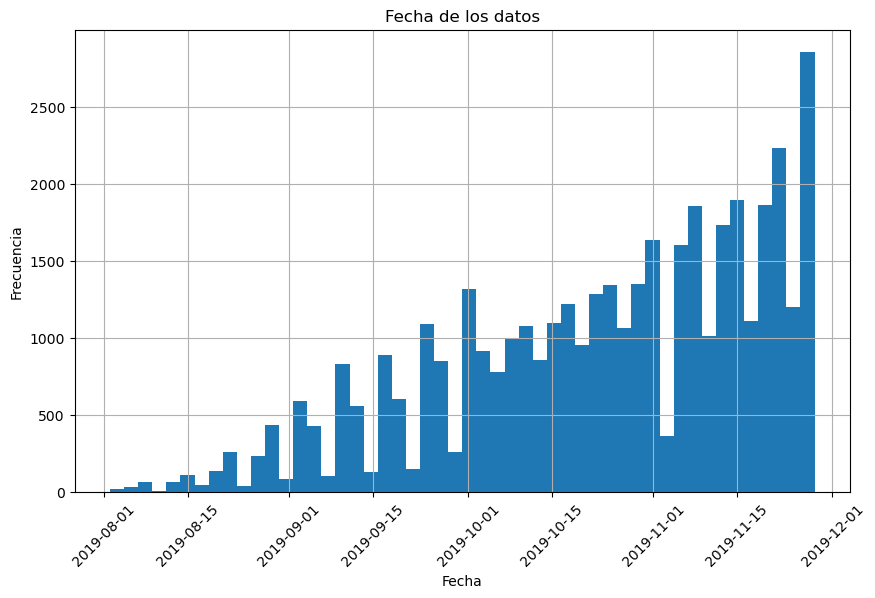

In [371]:
telecom['date_call'].hist(bins=50,figsize=(10,6))
plt.title('Fecha de los datos')
plt.xlabel('Fecha')
plt.ylabel('Frecuencia')
plt.xticks(rotation=45)
plt.show()

El tiempo de recuperaciòn de datos se presenta entre los meses de agosto y noviembre del 2019.

Se identifican los operadores mas comunes.

In [372]:
telecom.groupby('operator_id').agg({'user_id':'count'}).sort_values(by='user_id',ascending=False)

,user_id
operator_id,
901884.0,323
901880.0,302
893804.0,289
885876.0,283
887276.0,267
...,...
946468.0,1
899912.0,1
947306.0,1


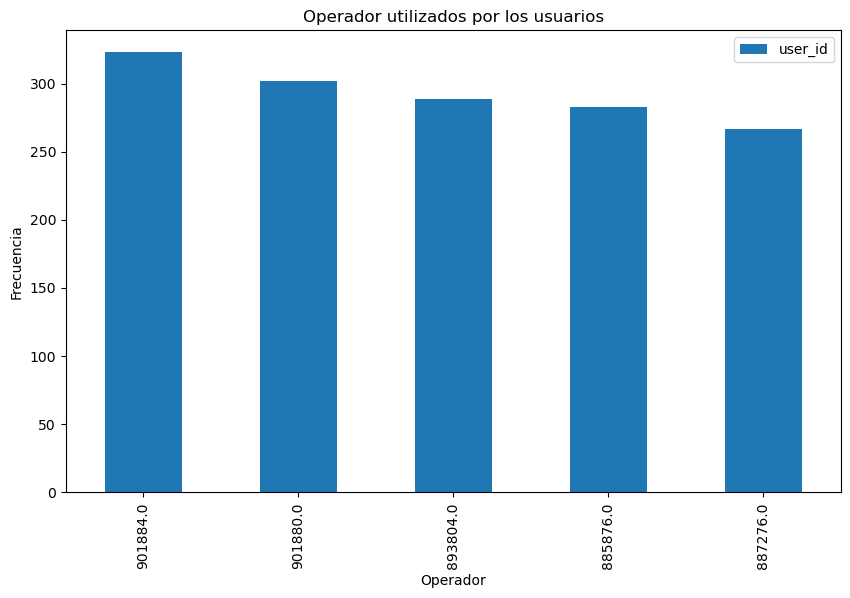

In [373]:
telecom.groupby('operator_id').agg({'user_id':'count'}).sort_values(by='user_id',ascending=False).head().plot(kind='bar',figsize=(10,6))
plt.title('Operador utilizados por los usuarios')
plt.xlabel('Operador')
plt.ylabel('Frecuencia')
plt.show()

Los operadores mas utilizados por parte de los usuarios son: 901884, 901880, 893804, 885876 y 887276.

Se identifican los porcentajes de llamadas perdidas.

In [374]:
telecom['is_missed_call'].value_counts()/len(telecom)*100

False    66.037645
True     33.962355
Name: is_missed_call, dtype: float64

Se identifica que  aproximadamente el 34% de las llamadas son perdidas.

# Identificaciòn de datos atìpicos <a id='atipicos'></a>

**Teniendo en cuenta los altos valores en algunas de las variables cuantitativas, se identifican posibles datos atìpicos.**

Inicialmente, se identifican posibles datos atìpicos entre la informaciòn de los tiempos de espera de las llamadas que se recopilan en las columnas "total_call_duration" y "call_duration", y en la columna "calls_count".

In [375]:
telecom['total_call_duration'].describe()

count     41546.000000
mean       1321.592813
std        4785.978633
min           0.000000
25%          67.000000
50%         288.000000
75%        1104.000000
max      166155.000000
Name: total_call_duration, dtype: float64

Se identifica una desviaciòn estàndar muy alta para los datos de la columna "total_call_duration". Adicionalmente, se encuentra gran diferencia entre los datos de la media y la mediana; lo cual puede atribuirse a datos atìpicos o posibles problemas durante la entrada de los datos.

Se considera que los datos registrados para la columna "total_call_duration" puede encontrarse en segundos; lo cual puede ser la causa de que se arrojen valores tan altos.

La columna "total_call_duration" se pasa a minutos, para verificar la variaciòn en los datos.

In [376]:
telecom['total_call_duration']=telecom['total_call_duration']/60 #La duraciòn total de la llamada se pasa a minutos.

In [377]:
telecom['total_call_duration'].describe() #Se verifica nuevamente la informaciòn estadìstica en "total_call_duration"

count    41546.000000
mean        22.026547
std         79.766311
min          0.000000
25%          1.116667
50%          4.800000
75%         18.400000
max       2769.250000
Name: total_call_duration, dtype: float64

Se identifica una disminuciòn en la desviaciòn estàndar; sin embargo se continùa evidenciando una desviaciòn alta (>79).

Se identifica que el dato mìnimo para la columna "total_call_duration" es igual a 0. Se filtran èstos datos para identificar los posibles casos en los que se presenta èste valor.

In [378]:
telecom.query('total_call_duration==0')

,user_id,date,internal,operator_id,is_missed_call,calls_count,call_duration,total_call_duration,date_call,out_call
38,166377,2019-08-14 00:00:00+03:00,True,880026.0,True,2,0,0.0,2019-08-14,True
80,166377,2019-08-26 00:00:00+03:00,True,880022.0,True,3,0,0.0,2019-08-26,True
113,166377,2019-09-02 00:00:00+03:00,True,880020.0,True,2,0,0.0,2019-09-02,True
137,166377,2019-09-05 00:00:00+03:00,True,880022.0,True,2,0,0.0,2019-09-05,True
139,166377,2019-09-06 00:00:00+03:00,True,880022.0,True,2,0,0.0,2019-09-06,True
...,...,...,...,...,...,...,...,...,...,...
48599,168416,2019-10-29 00:00:00+03:00,True,948182.0,True,1,0,0.0,2019-10-29,True
48666,168416,2019-11-19 00:00:00+03:00,True,948182.0,True,1,0,0.0,2019-11-19,True
48720,168466,2019-10-31 00:00:00+03:00,False,952114.0,True,1,0,0.0,2019-10-31,True
48753,168466,2019-11-18 00:00:00+03:00,False,952114.0,True,10,0,0.0,2019-11-18,True


Se evidencia que el valor de cero para la columana "total_call_duration" se manifiesta en los casos en los que la llamada es perdida. Se decide no reemplazar èstos valores.

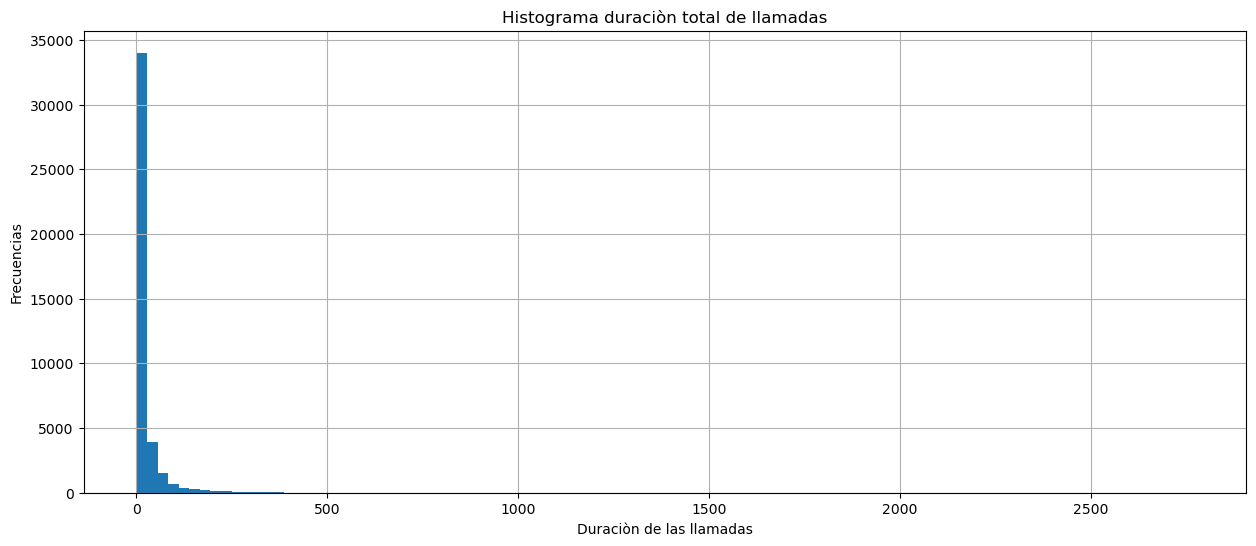

In [379]:
telecom['total_call_duration'].hist(bins=100,figsize=(15,6)) # Creamos histograma de la duraciòn total de las llamadas".
plt.title("Histograma duraciòn total de llamadas")
plt.xlabel("Duraciòn de las llamadas")
plt.ylabel("Frecuencias")
plt.show()

De acuerdo con el histograma que relaciona los tiempos de duraciòn de las llamadas (teniendo en cuenta los tiempos de espera), gran cantidad de los tiempos de espera es igual a cero; lo cual muestra muchos casos de llamadas perdidas.

Se verifica la informaciòn estadìstica de la columna "call_duration", que relaciona los tiempos de las llamadas sin tener en cuenta los tiempos de espera.

In [380]:
telecom['call_duration'].describe()

count     41546.000000
mean       1009.769172
std        4064.106117
min           0.000000
25%           0.000000
50%         106.000000
75%         770.000000
max      144395.000000
Name: call_duration, dtype: float64

Para èsta columna, tambièn se identifica una desviaciòn estàndar muy alta, y una gran diferencia entre la media (1009) y la mediana(106). Ademàs un valor muy grande para el valor màximo (144395).

Se considera que los datos fueron registrados en la columna "call_duration" se encuentra en segundos, por lo cual se pasan a minutos.

In [381]:
telecom['call_duration']=telecom['call_duration']/60

In [382]:
telecom['call_duration'].describe() #Se verifica informaciòn estadìstica en la columna "call_duration".

count    41546.000000
mean        16.829486
std         67.735102
min          0.000000
25%          0.000000
50%          1.766667
75%         12.833333
max       2406.583333
Name: call_duration, dtype: float64

**Se genera un histograma que represente la variaciòn en los tiempos de las llamadas**

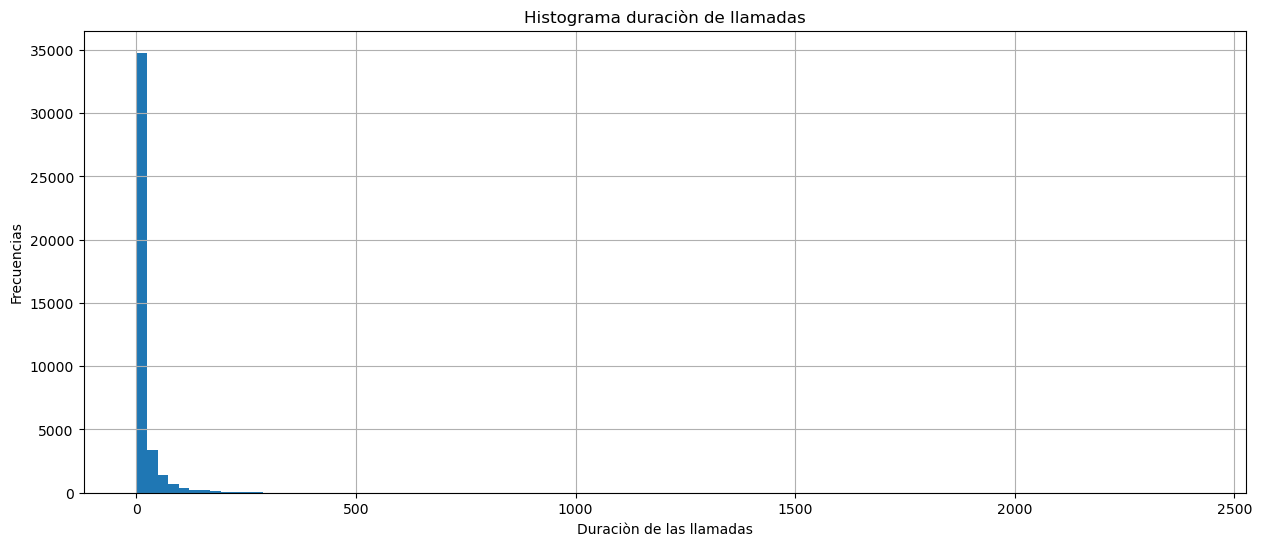

In [383]:
telecom['call_duration'].hist(bins=100,figsize=(15,6)) # Creamos histograma de las duraciones de las llamadas.
plt.title("Histograma duraciòn de llamadas")
plt.xlabel("Duraciòn de las llamadas")
plt.ylabel("Frecuencias")
plt.show()

Se presenta una gran tendencia a los valores de cero para los tiempos de las llamadas.

In [384]:
telecom.query('call_duration==0')

,user_id,date,internal,operator_id,is_missed_call,calls_count,call_duration,total_call_duration,date_call,out_call
1,166377,2019-08-05 00:00:00+03:00,True,880022.0,True,3,0.0,0.083333,2019-08-05,True
2,166377,2019-08-05 00:00:00+03:00,True,880020.0,True,1,0.0,0.016667,2019-08-05,True
4,166377,2019-08-05 00:00:00+03:00,False,880022.0,True,3,0.0,0.416667,2019-08-05,True
6,166377,2019-08-05 00:00:00+03:00,False,880020.0,True,8,0.0,0.833333,2019-08-05,True
9,166377,2019-08-06 00:00:00+03:00,False,881278.0,True,3,0.0,0.483333,2019-08-06,True
...,...,...,...,...,...,...,...,...,...,...
48987,168603,2019-11-21 00:00:00+03:00,False,959118.0,True,1,0.0,0.166667,2019-11-21,True
48991,168606,2019-11-08 00:00:00+03:00,False,957922.0,True,2,0.0,0.666667,2019-11-08,True
48992,168606,2019-11-08 00:00:00+03:00,False,957922.0,True,1,0.0,0.116667,2019-11-08,False
48997,168606,2019-11-10 00:00:00+03:00,True,957922.0,False,1,0.0,0.416667,2019-11-10,True


Se identifica que los tiempos de llamadas (sin contar los tiempos de espera), donde se arrojan valores de cero, se manfiiestan en los casos en los que se registra una llamada perdida.

In [385]:
telecom['calls_count'].describe()

count    41546.000000
mean        16.900424
std         59.749373
min          1.000000
25%          1.000000
50%          4.000000
75%         13.000000
max       4817.000000
Name: calls_count, dtype: float64

Para la columna "calls_count" se identifica un valor màximo muy grande (4817); lo cual se considera atìpico, por lo cual es importante verificar èstos datos.

**Se genera un histograma que represente la variaciòn en la cantidad de llamadas.**

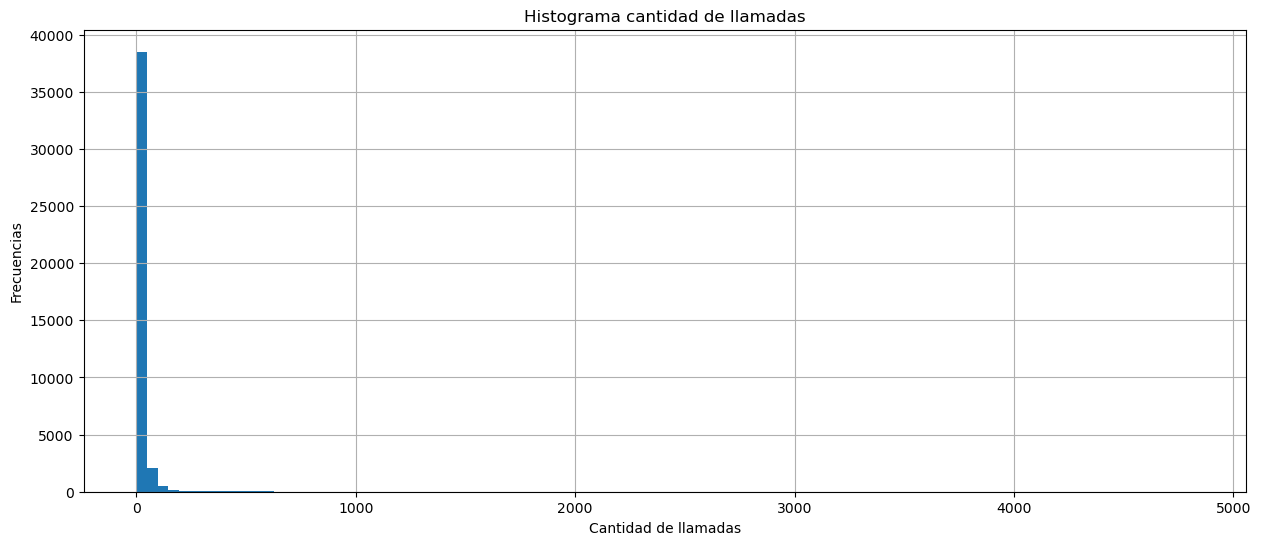

In [386]:
telecom['calls_count'].hist(bins=100,figsize=(15,6)) # Creamos histograma de las cantidades de llamadas.
plt.title("Histograma cantidad de llamadas")
plt.xlabel("Cantidad de llamadas")
plt.ylabel("Frecuencias")
plt.show()

**Se filtran los valores atìpicos para las columnas: total_call_duration,call_duration y call_count**

**Datos atìpicos "total_call_duration"**

In [387]:
Q1total_duration=telecom["total_call_duration"].quantile(0.25)
Q3total_duration=telecom["total_call_duration"].quantile(0.75)
IQRtotal_duration=Q3total_duration-Q1total_duration
limtotal_duration1=Q1total_duration-1.5*IQRtotal_duration
limtotal_duration2=Q3total_duration+1.5*IQRtotal_duration

In [388]:
limtotal_duration1 #Lìmite inferior columna total_call_duration

-24.80833333333333

In [389]:
limtotal_duration2 #Lìmite superior columna total_call_duration

44.324999999999996

Se filtran los lìmites inferiores y superiores para la columna "total_call_duration"

In [390]:
telecom.query("total_call_duration >= -24.8 and total_call_duration <= 44.3")

,user_id,date,internal,operator_id,is_missed_call,calls_count,call_duration,total_call_duration,date_call,out_call
1,166377,2019-08-05 00:00:00+03:00,True,880022.0,True,3,0.000000,0.083333,2019-08-05,True
2,166377,2019-08-05 00:00:00+03:00,True,880020.0,True,1,0.000000,0.016667,2019-08-05,True
3,166377,2019-08-05 00:00:00+03:00,True,880020.0,False,1,0.166667,0.300000,2019-08-05,True
4,166377,2019-08-05 00:00:00+03:00,False,880022.0,True,3,0.000000,0.416667,2019-08-05,True
5,166377,2019-08-05 00:00:00+03:00,False,880020.0,False,2,0.050000,0.483333,2019-08-05,True
...,...,...,...,...,...,...,...,...,...,...
48995,168606,2019-11-08 00:00:00+03:00,False,957922.0,False,2,11.433333,11.750000,2019-11-08,False
48996,168606,2019-11-09 00:00:00+03:00,False,957922.0,False,4,9.183333,9.883333,2019-11-09,True
48997,168606,2019-11-10 00:00:00+03:00,True,957922.0,False,1,0.000000,0.416667,2019-11-10,True
48998,168606,2019-11-10 00:00:00+03:00,True,957922.0,True,1,0.000000,0.633333,2019-11-10,True


In [391]:
telecom.query("total_call_duration >= -24.8 and total_call_duration <= 44.3")['total_call_duration'].describe()

count    36839.000000
mean         8.125423
std         10.237144
min          0.000000
25%          0.933333
50%          3.533333
75%         11.416667
max         44.300000
Name: total_call_duration, dtype: float64

Al atender los datos atìpicos de la columna 'total_call_duration', se encuentra una desviaciòn estàndar de 10.2

**Datos atìpicos "call_duration**

In [392]:
Q1call_duration=telecom["call_duration"].quantile(0.25)
Q3call_duration=telecom["call_duration"].quantile(0.75)
IQRcall_duration=Q3call_duration-Q1call_duration
limcall_duration1=Q1call_duration-1.5*IQRcall_duration
limcall_duration2=Q3call_duration+1.5*IQRcall_duration

In [393]:
limcall_duration1 #Lìmite inferior columna call_duration

-19.25

In [394]:
limcall_duration2 #Lìmite superior columna call_duration

32.083333333333336

Se filtran los lìmites inferiores y superiores de la columna "call_duration".

In [395]:
telecom.query("call_duration >= -19.25 and call_duration <= 32.08 ")

,user_id,date,internal,operator_id,is_missed_call,calls_count,call_duration,total_call_duration,date_call,out_call
1,166377,2019-08-05 00:00:00+03:00,True,880022.0,True,3,0.000000,0.083333,2019-08-05,True
2,166377,2019-08-05 00:00:00+03:00,True,880020.0,True,1,0.000000,0.016667,2019-08-05,True
3,166377,2019-08-05 00:00:00+03:00,True,880020.0,False,1,0.166667,0.300000,2019-08-05,True
4,166377,2019-08-05 00:00:00+03:00,False,880022.0,True,3,0.000000,0.416667,2019-08-05,True
5,166377,2019-08-05 00:00:00+03:00,False,880020.0,False,2,0.050000,0.483333,2019-08-05,True
...,...,...,...,...,...,...,...,...,...,...
48995,168606,2019-11-08 00:00:00+03:00,False,957922.0,False,2,11.433333,11.750000,2019-11-08,False
48996,168606,2019-11-09 00:00:00+03:00,False,957922.0,False,4,9.183333,9.883333,2019-11-09,True
48997,168606,2019-11-10 00:00:00+03:00,True,957922.0,False,1,0.000000,0.416667,2019-11-10,True
48998,168606,2019-11-10 00:00:00+03:00,True,957922.0,True,1,0.000000,0.633333,2019-11-10,True


**Datos atìpicos columna "calls_count"**

In [396]:
Q1calls_count=telecom["calls_count"].quantile(0.25)
Q3calls_count=telecom["calls_count"].quantile(0.75)
IQRcalls_count=Q3calls_count-Q1calls_count
limcalls_count1=Q1calls_count-1.5*IQRcalls_count
limcalls_count2=Q3calls_count+1.5*IQRcalls_count

In [397]:
limcalls_count1 #Lìmite inferior columna calls_count

-17.0

In [398]:
limcalls_count2 #Lìmite superior columna calls_coount.

31.0

Se filtran los lìmites inferiores y superiores de la columna "calls_count".

In [399]:
telecom.query("calls_count >= -17 and calls_count <= 31.0 ")

,user_id,date,internal,operator_id,is_missed_call,calls_count,call_duration,total_call_duration,date_call,out_call
1,166377,2019-08-05 00:00:00+03:00,True,880022.0,True,3,0.000000,0.083333,2019-08-05,True
2,166377,2019-08-05 00:00:00+03:00,True,880020.0,True,1,0.000000,0.016667,2019-08-05,True
3,166377,2019-08-05 00:00:00+03:00,True,880020.0,False,1,0.166667,0.300000,2019-08-05,True
4,166377,2019-08-05 00:00:00+03:00,False,880022.0,True,3,0.000000,0.416667,2019-08-05,True
5,166377,2019-08-05 00:00:00+03:00,False,880020.0,False,2,0.050000,0.483333,2019-08-05,True
...,...,...,...,...,...,...,...,...,...,...
48996,168606,2019-11-09 00:00:00+03:00,False,957922.0,False,4,9.183333,9.883333,2019-11-09,True
48997,168606,2019-11-10 00:00:00+03:00,True,957922.0,False,1,0.000000,0.416667,2019-11-10,True
48998,168606,2019-11-10 00:00:00+03:00,True,957922.0,True,1,0.000000,0.633333,2019-11-10,True
48999,168606,2019-11-11 00:00:00+03:00,True,957922.0,False,2,7.983333,8.350000,2019-11-11,True


**Se eliminan los datos atìpicos.**

In [400]:
telecom_clean1=telecom.query("total_call_duration >= -24.8 and total_call_duration <= 44.3")

In [401]:
telecom_clean2=telecom_clean1.query("call_duration >= -19.25 and call_duration <= 32.08 ")

In [402]:
telecom_sin_outliers=telecom_clean2.query("calls_count >= -17 and calls_count <= 31.0 ")

In [403]:
telecom_sin_outliers

,user_id,date,internal,operator_id,is_missed_call,calls_count,call_duration,total_call_duration,date_call,out_call
1,166377,2019-08-05 00:00:00+03:00,True,880022.0,True,3,0.000000,0.083333,2019-08-05,True
2,166377,2019-08-05 00:00:00+03:00,True,880020.0,True,1,0.000000,0.016667,2019-08-05,True
3,166377,2019-08-05 00:00:00+03:00,True,880020.0,False,1,0.166667,0.300000,2019-08-05,True
4,166377,2019-08-05 00:00:00+03:00,False,880022.0,True,3,0.000000,0.416667,2019-08-05,True
5,166377,2019-08-05 00:00:00+03:00,False,880020.0,False,2,0.050000,0.483333,2019-08-05,True
...,...,...,...,...,...,...,...,...,...,...
48995,168606,2019-11-08 00:00:00+03:00,False,957922.0,False,2,11.433333,11.750000,2019-11-08,False
48996,168606,2019-11-09 00:00:00+03:00,False,957922.0,False,4,9.183333,9.883333,2019-11-09,True
48997,168606,2019-11-10 00:00:00+03:00,True,957922.0,False,1,0.000000,0.416667,2019-11-10,True
48998,168606,2019-11-10 00:00:00+03:00,True,957922.0,True,1,0.000000,0.633333,2019-11-10,True


Se identifica el porcentaje de datos que se conservan al eliminar los datos atìpicos.

In [404]:
len(telecom_sin_outliers)/len(telecom)*100

81.85384874596832

Se identifica que se conserva el 81% de los datos.

Inicialmente se crea una nueva columna que recopile los datos de los tiempos de espera.

In [405]:
telecom_sin_outliers['time_call']=telecom_sin_outliers['total_call_duration']-telecom_sin_outliers['call_duration']

C:\Users\andre.DESKTOP-LACGQDJ\AppData\Local\Temp\ipykernel_14640\2676515878.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  telecom_sin_outliers['time_call']=telecom_sin_outliers['total_call_duration']-telecom_sin_outliers['call_duration']


**Se descarga csv con los datos limpios**

In [406]:
telecom.to_csv('telecom_sin_outliers.csv',index=False)

Se analizan los tiempos de espera por operador.

In [407]:
telecom_sin_outliers.groupby('operator_id').agg({'time_call':'sum'}).sort_values(by='time_call',ascending=False)

,time_call
operator_id,
899082.0,677.750000
893804.0,623.516667
880028.0,590.650000
905538.0,558.166667
923526.0,522.216667
...,...
946454.0,0.000000
958458.0,0.000000
919192.0,0.000000


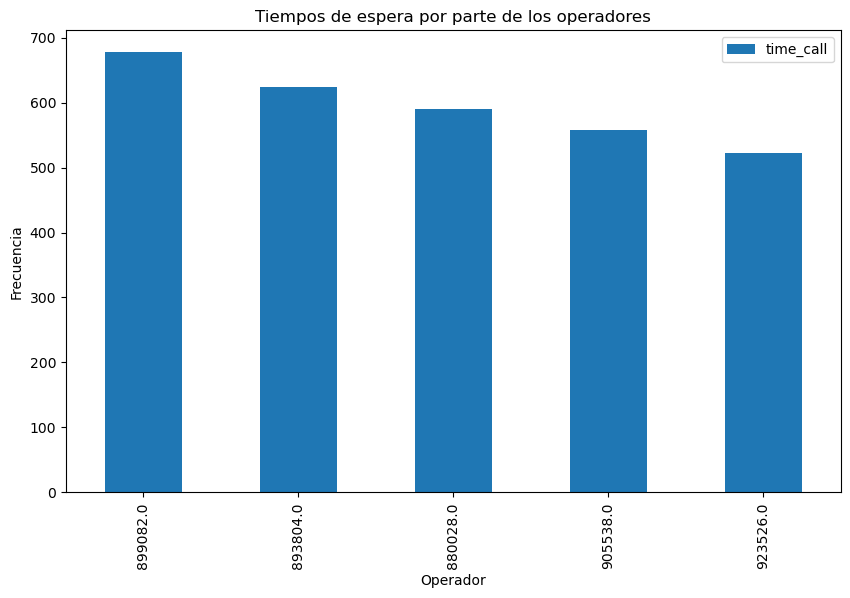

In [408]:
telecom_sin_outliers.groupby('operator_id').agg({'time_call':'sum'}).sort_values(by='time_call',ascending=False).head().plot(kind='bar',figsize=(10,6))
plt.title('Tiempos de espera por parte de los operadores')
plt.xlabel('Operador')
plt.ylabel('Frecuencia')
plt.show()

Los operadores en los que se presentan mayores tiempos de espera son: 889082, 893804 , 880028, 905538  y 923526 .

Se identifican los operadores en los que se evidencian mayor cantidad de llamadas perdidas.

In [409]:
telecom_sin_outliers.groupby('operator_id').agg({'is_missed_call':'sum'}).sort_values(by='is_missed_call',ascending=False)

,is_missed_call
operator_id,
891410.0,118
891414.0,112
901880.0,110
901884.0,104
893804.0,101
...,...
917876.0,0
948524.0,0
949252.0,0


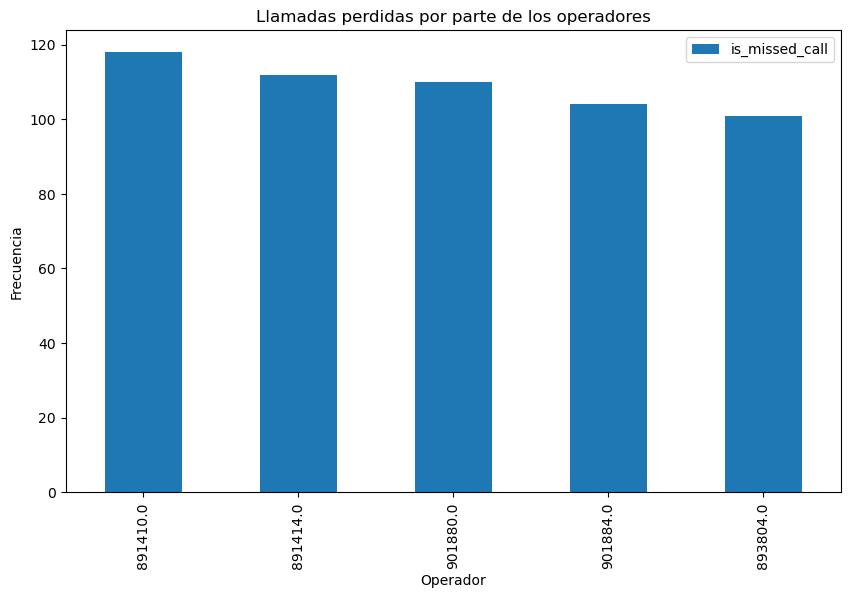

In [410]:
telecom_sin_outliers.groupby('operator_id').agg({'is_missed_call':'sum'}).sort_values(by='is_missed_call',ascending=False).head().plot(kind='bar',figsize=(10,6))
plt.title('Llamadas perdidas por parte de los operadores')
plt.xlabel('Operador')
plt.ylabel('Frecuencia')
plt.show()

Se identifica que los operadores con mas registros de llamadas perdidas son: 891410, 891414,901880, 901884 y 893804.

Se identifican los usuarios que registran mayor cantidad de llamadas salientes.

In [411]:
telecom_sin_outliers.groupby('operator_id').agg({'out_call':'sum'}).sort_values(by='out_call',ascending=False)

,out_call
operator_id,
887276.0,197
901884.0,181
905566.0,169
905564.0,168
889410.0,163
...,...
920930.0,0
920874.0,0
951118.0,0


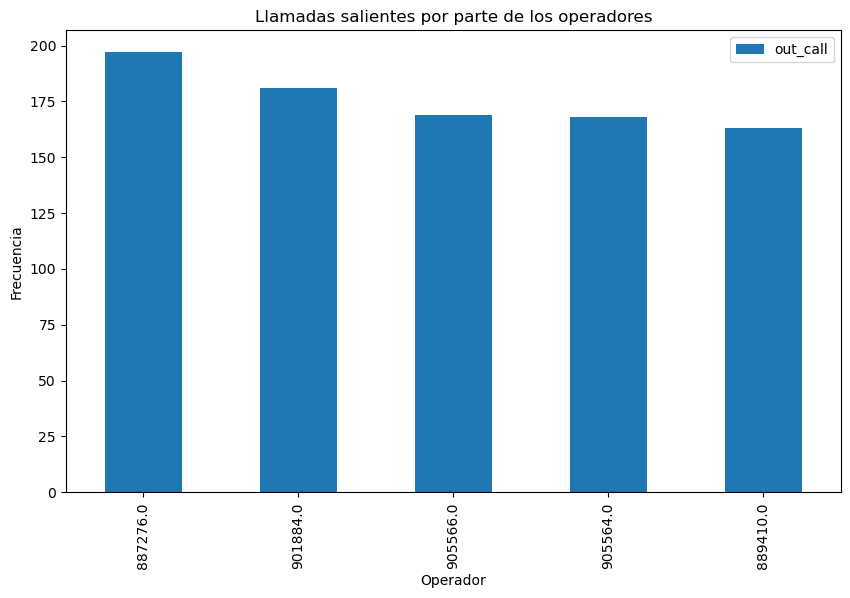

In [412]:
telecom_sin_outliers.groupby('operator_id').agg({'out_call':'sum'}).sort_values(by='out_call',ascending=False).head().plot(kind='bar',figsize=(10,6))
plt.title('Llamadas salientes por parte de los operadores')
plt.xlabel('Operador')
plt.ylabel('Frecuencia')
plt.show()

Entre los operadores con mayor cantidad de llamadas salientes se encuentran: 887276.0, 901884.0, 905566.0, 905564.0 y 889410.0

In [413]:
telecom_sin_outliers.dtypes

user_id                                               object
date                   datetime64[ns, pytz.FixedOffset(180)]
internal                                                bool
operator_id                                           object
is_missed_call                                          bool
calls_count                                            int64
call_duration                                        float64
total_call_duration                                  float64
date_call                                     datetime64[ns]
out_call                                                bool
time_call                                            float64
dtype: object

Los operadores que registran mayor cantidad de llamadas salientes son: 887276, 901884, 905566, 905564 y 889410. 

# Ejecuciòn del modelo <a id='modelo'></a>

**Teniendo en cuenta la gran cantidad de operadores registrados, se decide utilizar un modelo que permita clasificar los datos, y facilitar la identificaciòn de las caracterìsticas de eficiencia o ineficiencia de los operadores**.

Inicialmente se identifica la suma de cada variable cuantitativa para cada operador.

In [414]:
data_operadores=telecom_sin_outliers.pivot_table(index='operator_id',values=['is_missed_call','calls_count','call_duration','total_call_duration','internal','out_call','time_call'],aggfunc='sum')

In [415]:
data_operadores

,call_duration,calls_count,internal,is_missed_call,out_call,time_call,total_call_duration
operator_id,,,,,,,
879896.0,342.616667,502,15,47,86,142.250000,484.866667
879898.0,288.816667,1173,16,56,74,362.566667,651.383333
880020.0,37.416667,45,3,6,13,4.666667,42.083333
880022.0,212.266667,194,8,29,61,62.833333,275.100000
880026.0,813.800000,1197,13,87,122,261.916667,1075.716667
...,...,...,...,...,...,...,...
972410.0,24.900000,51,0,2,3,20.483333,45.383333
972412.0,26.166667,38,0,2,3,13.250000,39.416667
972460.0,20.300000,51,2,3,6,10.333333,30.633333


In [416]:
data_operadores.dtypes

call_duration          float64
calls_count              int64
internal                 int64
is_missed_call           int64
out_call                 int64
time_call              float64
total_call_duration    float64
dtype: object

**Se descarga csv con las sumas de las variables para cada operador**

In [417]:
telecom.to_csv('data_operadores.csv',index=False)

* Identificamos la relaciòn entre el nùmero de llamadas perdidas y el tiempo de espera.

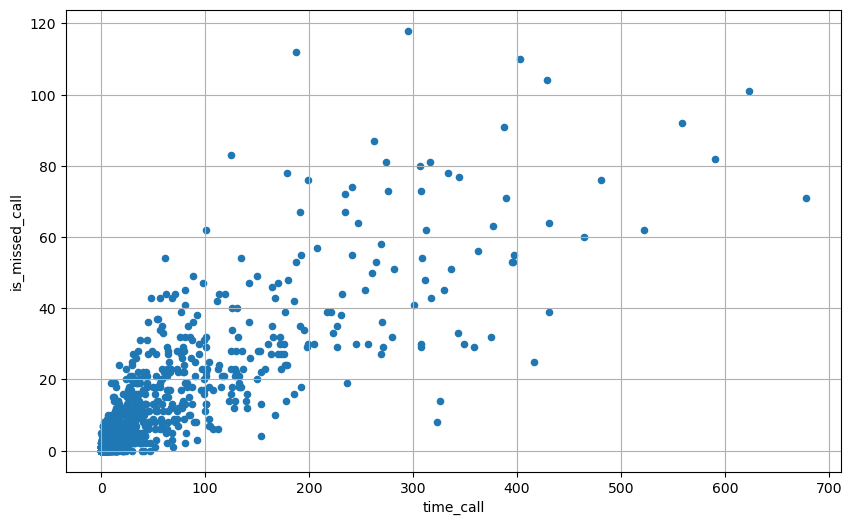

In [418]:
data_operadores.plot(kind="scatter",x="time_call",y="is_missed_call",figsize=(10,6),grid=True)
plt.show()

De acuerdo con el gràfico, entre menor es el tiempo de espera menor es la cantidad de llamadas perdidas.

* Identificamos la relaciòn entre el conteo de llamadas y las llamadas perdidas.

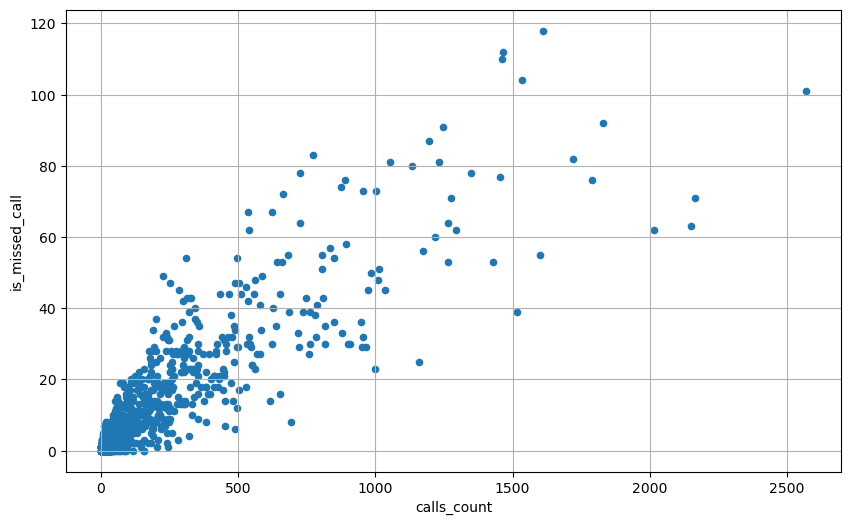

In [419]:
data_operadores.plot(kind="scatter",x="calls_count",y="is_missed_call",figsize=(10,6),grid=True)
plt.show()

De igual manera se identifica que a menor nùmero de llamadas, menor es la cantidad de llamadas perdidas.

**Creamos una matriz de correlaciòn para verificar las relaciones entre las variables**

In [420]:
corr=data_operadores.corr()
corr.style.background_gradient(cmap='coolwarm')

,call_duration,calls_count,internal,is_missed_call,out_call,time_call,total_call_duration
call_duration,1.000000,0.879863,0.372736,0.841863,0.833848,0.830755,0.989504
calls_count,0.879863,1.000000,0.337754,0.881948,0.817658,0.958007,0.929573
internal,0.372736,0.337754,1.000000,0.508047,0.629095,0.247003,0.352560
is_missed_call,0.841863,0.881948,0.508047,1.000000,0.948769,0.830316,0.867018
out_call,0.833848,0.817658,0.629095,0.948769,1.000000,0.756874,0.841750
time_call,0.830755,0.958007,0.247003,0.830316,0.756874,1.000000,0.902473
total_call_duration,0.989504,0.929573,0.352560,0.867018,0.841750,0.902473,1.000000


* Se identifica que la columna "is_missed_call" tiene una correlaciòn mas alta con la variable out_call, total_call_duration,time_call (tiempo de espera) y calls_count.

* La columna "time_call"(tiempo de espera de la llamada), tiene una correlaciòn mas alta con las variables total_call_duration, calls_count,call_duration y is_missed_call.

* La columna "out_call" tiene alta correlaciòn con is_missed_call, total_call_duration y calls_count.

**Se crea un nuevo dataframe sòlo con las variables que nos interesan para el modelo.**

Eliminamos la columna "total_call_duration", ya que tiene una correlaciòn muy alta con la columna "call_duration".El tiempo de espera ya se encuentra en la columna "time_call".

Se eliminan ademàs las columnas que no se consideran relevantes: internal.

In [421]:
modelo_eficiencia=data_operadores.drop(columns=['total_call_duration','internal','call_duration','calls_count'])

In [422]:
modelo_eficiencia

,is_missed_call,out_call,time_call
operator_id,,,
879896.0,47,86,142.250000
879898.0,56,74,362.566667
880020.0,6,13,4.666667
880022.0,29,61,62.833333
880026.0,87,122,261.916667
...,...,...,...
972410.0,2,3,20.483333
972412.0,2,3,13.250000
972460.0,3,6,10.333333


**Se decide utilizar el algoritmo no supervisado K-Means o clustering, para facilitar la clasificaciòn de los datos.**

In [423]:
x_stand=StandardScaler().fit_transform(modelo_eficiencia) # Se estandarizan los datos.

In [424]:
model_1= KMeans(n_clusters=2) #Se establece el nùmero de clùsters.

In [425]:
model_1.fit(x_stand) #Se ajusta el modelo.

C:\Users\andre.DESKTOP-LACGQDJ\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\andre.DESKTOP-LACGQDJ\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=5.
  warnings.warn(


KMeans(n_clusters=2)

In [426]:
modelo_eficiencia['labels']= model_1.labels_

In [427]:
modelo_eficiencia

,is_missed_call,out_call,time_call,labels
operator_id,,,,
879896.0,47,86,142.250000,1
879898.0,56,74,362.566667,1
880020.0,6,13,4.666667,0
880022.0,29,61,62.833333,1
880026.0,87,122,261.916667,1
...,...,...,...,...
972410.0,2,3,20.483333,0
972412.0,2,3,13.250000,0
972460.0,3,6,10.333333,0


In [428]:
telecom.to_csv('modelo_eficiencia.csv',index=False)

In [429]:
modelo_eficiencia.groupby('labels').mean()

,is_missed_call,out_call,time_call
labels,,,
0,5.441558,10.437229,21.820022
1,45.069182,81.415094,209.804717


**Llamadas perdidas por clùster**

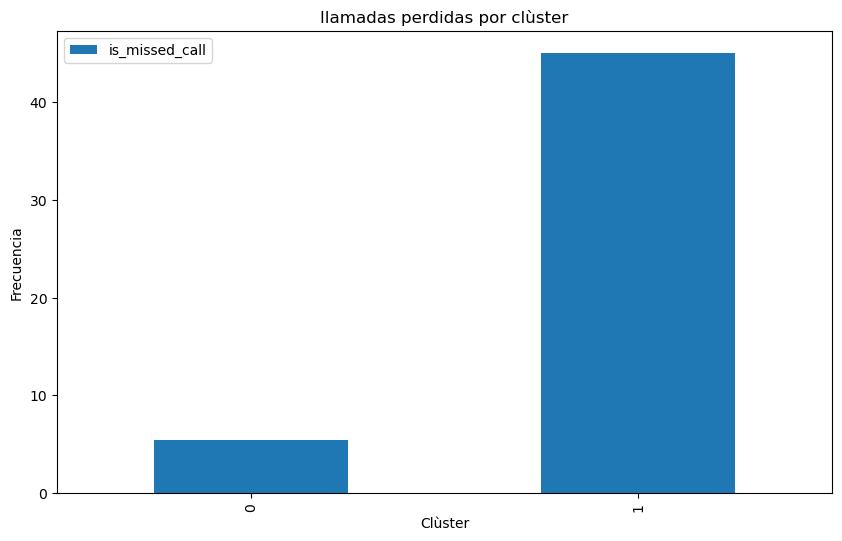

In [430]:
modelo_eficiencia.groupby('labels').agg({'is_missed_call':'mean'}).plot(kind='bar',figsize=(10,6))
plt.title('llamadas perdidas por clùster')
plt.xlabel('Clùster')
plt.ylabel('Frecuencia')
plt.show()

**Llamadas salientes por clùster**

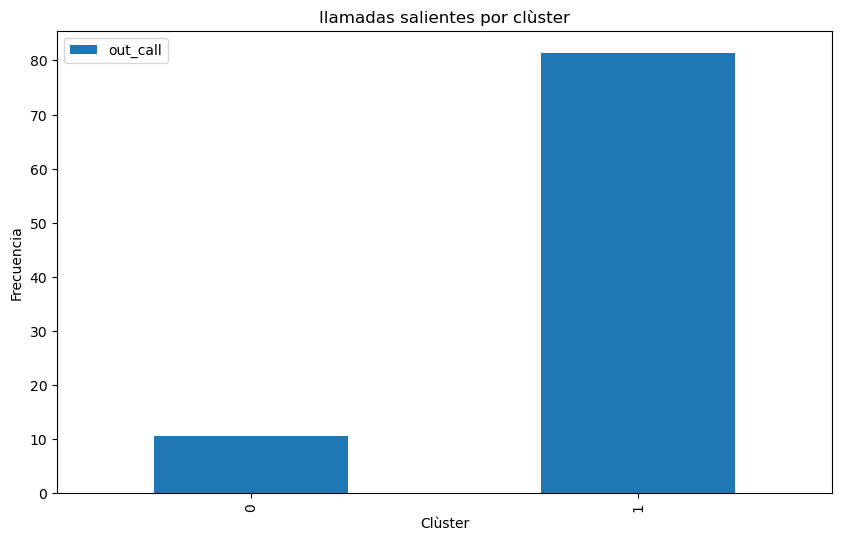

In [431]:
modelo_eficiencia.groupby('labels').agg({'out_call':'mean'}).plot(kind='bar',figsize=(10,6))
plt.title('llamadas salientes por clùster')
plt.xlabel('Clùster')
plt.ylabel('Frecuencia')
plt.show()

**Tiempos de espera por clùster**

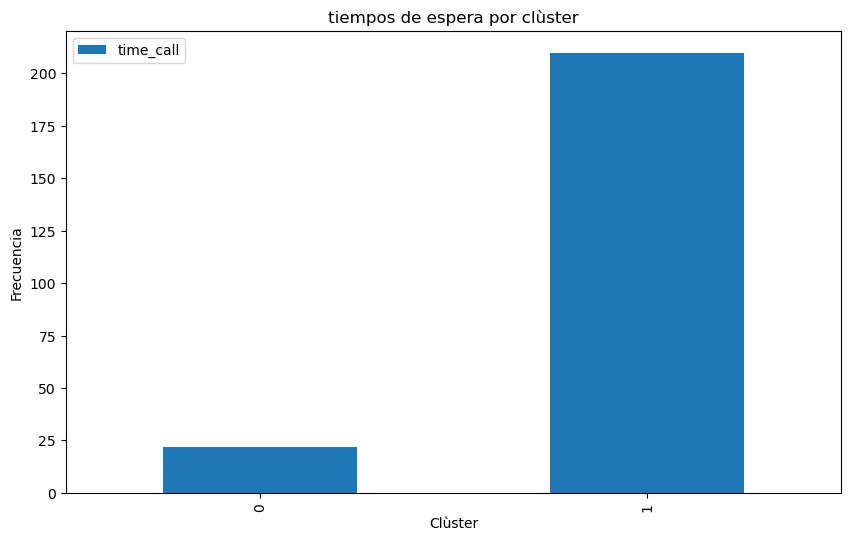

In [432]:
modelo_eficiencia.groupby('labels').agg({'time_call':'mean'}).plot(kind='bar',figsize=(10,6))
plt.title('tiempos de espera por clùster')
plt.xlabel('Clùster')
plt.ylabel('Frecuencia')
plt.show()

De acuerdo con el modelo, los operadores eficientes tienen aproximadamente 6 llamadas perdidas y un tiempo de espera promedio de 22 minutos. Los operadores ineficientes tienen en promedio 45 llamadas perdidas.

**Generamos un diagrama de dispersiòn en la que se visualicen las tendencias de cada clùster.**

In [433]:
pca=PCA(n_components=2)

In [434]:
pca_standard=pca.fit_transform(x_stand)

In [435]:
pca_results=np.hstack((pca_standard,model_1.labels_.reshape(-1,1)))

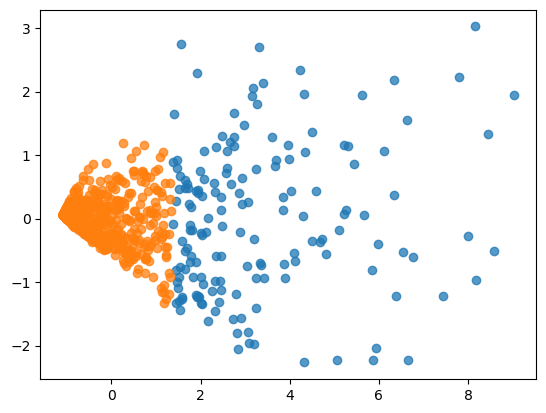

In [436]:
plt.scatter(pca_results[pca_results[:,2]==1,0],pca_results[pca_results[:,2]==1,1],alpha=0.75)
plt.scatter(pca_results[pca_results[:,2]==0,0],pca_results[pca_results[:,2]==0,1],alpha=0.75)

De acuerdo con el gràfico que muestra la clausterizaciòn, los operadores mas eficientes tienen tendencia a cero; mientras que los operadores menos eficientes tienden a alejarse del centro (0).

# Conclusiones <a id='conclusiones'></a>

Inicialmente se cambian los tipos de datos necesarios, se identifican datos ausentes y duplicados.

Se encuentran datos ausentes en las columnas ‘internal’ y ‘operator_id’. Los valores nulos en la columna "internal" representan el 0.2%, mientras que los valores nulos para la columna "operador_id" representa el 15%. Se identifica que al realizar el cambio del tipo de dato para la columna "internal" a tipo booleano, se atienden los datos nulos que se encontraban en èsta columna.

Se identificaron 4900 datos duplicados, los cuales se eliminaron para prevenir errores en los datos.

Se alimentan los datos, creando por ejemplo una funciòn que arroje el dato "False" si el valor de la columna "direction" es igual a in (entrante), y se arroje el valor de "True" si el valor de la columna "direction" es igual a in (saliente). Se crea ademàs una nueva columna llamada "out_call".

Se considera que la informaciòn del operador sòlo puede relacionarse con el usuario;por lo cual se intenta utilizar èsta informaciòn para imputar los datos y rellenar los valores ausentes de la columna "operator_id"; sin embargo, se identifica que existen 183 usuarios que reciben el servicio por más de un operador; lo cual representa mas del 59% de los usuarios; por lo cual èstos usuarios no pueden eliminarse. Luego de descartar la imputaciòn de datos de los usuarios para rellenar la informaciòn de los datos ausentes en la columna "operator_id", se decide entonces eliminar las filas en las que la columna operator id no posee informaciòn.

El tiempo de recuperación de datos se presenta entre los meses de agosto y noviembre del 2019.

Los operadores mas utilizados por parte de los usuarios son: 901884, 901880, 893804, 885876 y 887276.

Se identifica que aproximadamente el 34% de las llamadas son perdidas.

Se identifica una desviaciòn estàndar muy alta para los datos de la columna "total_call_duration". Adicionalmente, se encuentra gran diferencia entre los datos de la media y la mediana; lo cual puede atribuirse a datos atìpicos o posibles problemas durante la entrada de los datos. Se considera que los datos registrados para la columna "total_call_duration" puede encontrarse en segundos; lo cual puede ser la causa de que se arrojen valores tan altos; por lo cual se realiza el cambio de unidades de segundos a minutos al dividir entre 60. Despuès de cambiar la unidad a minutos, se identifica una disminuciòn en la desviaciòn estàndar; sin embargo se continùa evidenciando una desviaciòn alta (>79).

Para la columna ‘call_duration’, tambièn se encuentra una desviaciòn estàndar muy alta, y una gran diferencia entre la media (1009) y la mediana(106). Ademàs un valor muy grande para el valor màximo (144395), por lo cual se considera tambièn que los datos fueron registrados en la columna "call_duration" se encuentra en segundos, por lo cual se pasan a minutos.

Se identifica que los tiempos de llamadas (sin contar los tiempos de espera), donde se arrojan valores de cero, se manifiestan en los casos en los que se registra una llamada perdida.

Para la columna ‘total_call_duration’, se encuentra que el lìmite inferior es -24, y que el lìmite superior es 44.32.

Al identificar los datos atipicos de la columna ‘call_duration’, se encuentra que el lìmite inferior es -19.25, y que el lìmite superior es 32.08.

Para la columna ‘calls_count’, se encuentra que el lìmite inferior es -17, y que el lìmite superior es 31.

Al eliminar los datos atìpicos, se identifica que se conserva el 81% de los datos.

Los operadores en los que se presentan mayores tiempos de espera son: 889082, 893804 , 880028, 905538 y 923526 .

Se identifica que los operadores con mas registros de llamadas perdidas son: 891410, 891414,901880, 901884 y 893804.

Los operadores que registran mayor cantidad de llamadas salientes son: 887276, 901884, 905566, 905564 y 889410.

Teniendo en cuenta la gran cantidad de operadores registrados, se decide utilizar un modelo que permita clasificar los datos, y facilitar la identificaciòn de las caracterìsticas de eficiencia o ineficiencia de los operadores.

Inicialmente, se crea una tabla que recopile las sumas de las variables cuantitativas por operador.

Se crean gràficos de dispersiòn para verificar las relaciones entre algunas variables cuantitativas: De acuerdo con el gràfico, entre menor es el tiempo de espera menor es la cantidad de llamadas perdidas.

De igual manera se identifica que a menor nùmero de llamadas, menor es la cantidad de llamadas perdidas.

Se crea  una matriz de correlación para verificar las relaciones entre las variables: 

* Se identifica que la columna "is_missed_call" tiene una correlaciòn mas alta con la variable out_call, total_call_duration,time_call (tiempo de espera) y calls_count.
  
* La columna "time_call"(tiempo de espera de la llamada), tiene una correlaciòn mas alta con las variables total_call_duration, calls_count,call_duration y is_missed_call.
  
* La columna "out_call" tiene alta correlaciòn con is_missed_call, total_call_duration y calls_count.
  
Se decide utilizar el algoritmo no supervisado K-Means o clustering, para facilitar la clasificaciòn de los datos, se estandarizan los datos y se asigna un nùmero de clùste de dos (2), para dividir los datos en dos grupos, facilitando la identificaciòn de las caracterìsticas para los operadores eficientes e ineficientes.

De acuerdo con el modelo, los operadores eficientes tienen aproximadamente 6 llamadas perdidas y un tiempo de espera promedio de 22 minutos. Los operadores ineficientes tienen en promedio 45 llamadas perdidas.

Segùn el gràfico  que muestra la clausterizaciòn, los operadores más eficientes tienen tendencia a cero; mientras que los operadores menos eficientes tienden a alejarse del centro (0).

<div class="alert alert-block alert-success">
<b>Comentario para el alumno</b> <a class="tocSkip"></a> Quiero felicitarte por un excelente trabajo en tu análisis de datos. Has demostrado un sólido entendimiento de las mejores prácticas en esta disciplina. Tus esfuerzos en la limpieza y transformación de datos, así como en la creación de nuevas variables, son encomiables. También has manejado eficazmente los datos atípicos y has aplicado técnicas de aprendizaje automático, como el algoritmo K-Means, de manera impresionante para la clasificación de operadores. La claridad en la comunicación de tus resultados a lo largo del análisis es otro punto fuerte. En general, tu enfoque exhaustivo y tus habilidades son esenciales para realizar análisis de datos efectivos. ¡Sigue adelante con tu trabajo en esta área!
</div>

# Presentaciòn y dasboard <a id='presentacion_dasboard'></a>

**Link presentaciòn:** https://drive.google.com/file/d/1xgqB7LDZq_-uhQrEQaDvW9za7X4jTAHG/view?usp=drive_link

**Link_dashboard:** https://public.tableau.com/authoring/Eficiencia_operadores/Duracindellamadasvsoperador#1